In [1]:
import os
import pandas as pd
import numpy as np
# List all files in the dataset folder to find the exact path to the ZIP file
dataset_folder = '/kaggle/input/mango-leaf-bd-dataset'
for root, dirs, files in os.walk(dataset_folder):
    for file in files:
        print(os.path.join(root, file))


/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_124627 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125226 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125656 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125157 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/20211109_121933 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_125339 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IMG_20211107_115649 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/20211109_122151(0) (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/20211109_122241 (Custom).jpg
/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew/IM

In [2]:

# List all files and directories in the main dataset folder
dataset_folder = '/kaggle/input/mango-leaf-bd-dataset'
for root, dirs, files in os.walk(dataset_folder):
    print(f"Directory: {root}")
    for name in dirs:
        print(f"  Subdirectory: {name}")
    for name in files:
        print(f"  File: {name}")


Directory: /kaggle/input/mango-leaf-bd-dataset
  Subdirectory: MangoLeafBD Dataset
Directory: /kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset
  Subdirectory: Powdery Mildew
  Subdirectory: Cutting Weevil
  Subdirectory: Anthracnose
  Subdirectory: Bacterial Canker
  Subdirectory: Sooty Mould
  Subdirectory: Gall Midge
  Subdirectory: Healthy
  Subdirectory: Die Back
Directory: /kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset/Powdery Mildew
  File: IMG_20211107_124627 (Custom).jpg
  File: IMG_20211107_125226 (Custom).jpg
  File: IMG_20211107_125656 (Custom).jpg
  File: IMG_20211107_125157 (Custom).jpg
  File: 20211109_121933 (Custom).jpg
  File: IMG_20211107_125339 (Custom).jpg
  File: IMG_20211107_115649 (Custom).jpg
  File: 20211109_122151(0) (Custom).jpg
  File: 20211109_122241 (Custom).jpg
  File: IMG_20211107_130039 (Custom).jpg
  File: 20211109_121859 (Custom).jpg
  File: 20211109_121423 (Custom).jpg
  File: 20211109_121803 (Custom).jpg
  File: 20211109_122130 (Cust

In [3]:

import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from collections import Counter

dataset_path = '/kaggle/input/mango-leaf-bd-dataset'



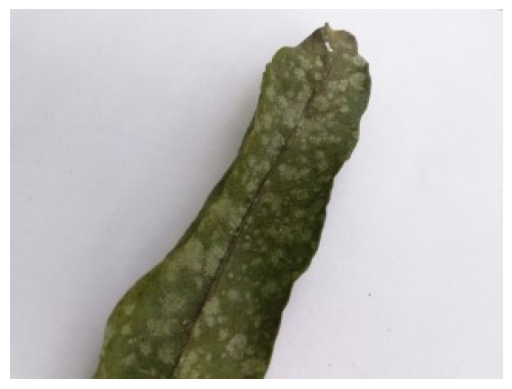

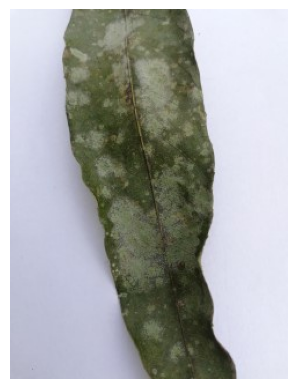

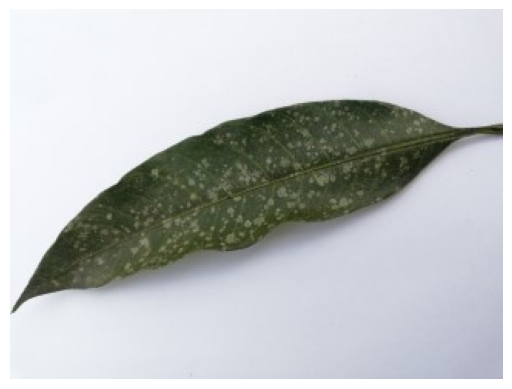

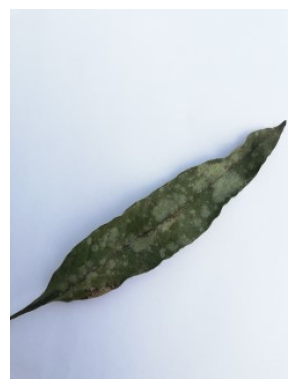

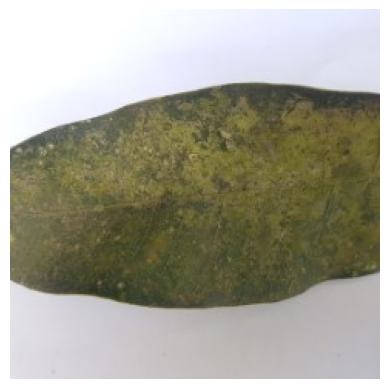

In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

dataset_path = '/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset'
image_paths = []

# Loop through all subfolders to collect image paths
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Adjust as needed for image formats
            image_paths.append(os.path.join(root, file))

# Load and display the images (optional)
if image_paths:
    for img_path in image_paths[:5]:  # Display first 5 images as a sample
        img = Image.open(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
else:
    print("No images found.")


# **Part 1: Exploratory Data Analysis (EDA)**

Importing Necessary Libraries

In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [6]:
dataset_path = '/kaggle/input/mango-leaf-bd-dataset/MangoLeafBD Dataset'


Load Image Paths

In [7]:
image_paths = []

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')):  # Adjust as needed
            image_paths.append(os.path.join(root, file))

print(f"Found {len(image_paths)} images.")


Found 4000 images.


Visualize some sample images

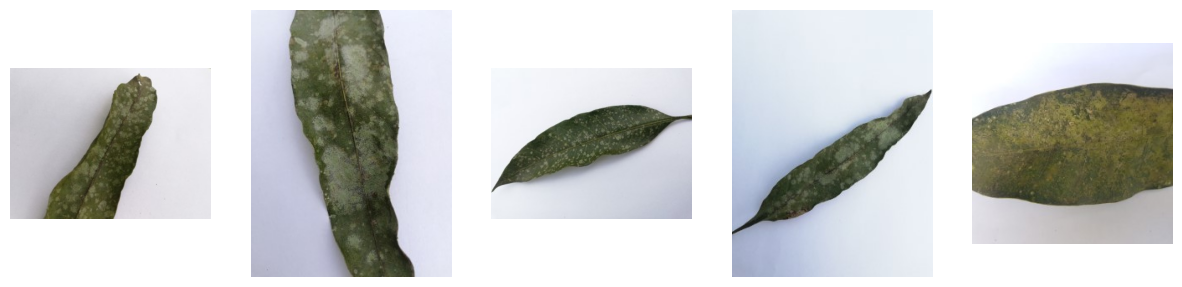

In [8]:
def display_images(image_paths, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img = Image.open(image_paths[i])
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()

display_images(image_paths)


Analyze Image Properties

In [9]:
image_sizes = []
image_modes = []

for img_path in image_paths:
    img = Image.open(img_path)
    image_sizes.append(img.size)
    image_modes.append(img.mode)

image_sizes = np.array(image_sizes)

print(f"Total images: {len(image_paths)}")
print(f"Unique image dimensions: {np.unique(image_sizes, axis=0)}")
print(f"Unique image modes: {set(image_modes)}")


Total images: 4000
Unique image dimensions: [[187 320]
 [189 320]
 [210 320]
 [213 320]
 [214 320]
 [217 320]
 [218 320]
 [219 320]
 [224 320]
 [226 320]
 [229 320]
 [234 320]
 [237 320]
 [238 320]
 [240 240]
 [240 245]
 [240 246]
 [240 262]
 [240 263]
 [240 265]
 [240 271]
 [240 272]
 [240 273]
 [240 282]
 [240 283]
 [240 285]
 [240 290]
 [240 297]
 [240 299]
 [240 306]
 [240 308]
 [240 317]
 [240 320]
 [244 240]
 [249 240]
 [262 240]
 [266 240]
 [282 240]
 [284 240]
 [288 240]
 [292 240]
 [297 240]
 [300 240]
 [302 240]
 [304 240]
 [305 240]
 [307 240]
 [309 240]
 [313 240]
 [314 240]
 [320  70]
 [320  86]
 [320  92]
 [320 160]
 [320 162]
 [320 166]
 [320 171]
 [320 173]
 [320 175]
 [320 179]
 [320 182]
 [320 193]
 [320 195]
 [320 197]
 [320 199]
 [320 200]
 [320 205]
 [320 206]
 [320 207]
 [320 209]
 [320 210]
 [320 211]
 [320 212]
 [320 213]
 [320 214]
 [320 217]
 [320 218]
 [320 219]
 [320 220]
 [320 221]
 [320 222]
 [320 223]
 [320 224]
 [320 226]
 [320 227]
 [320 228]
 [320 229]

Visualize the distribution of image sizes:

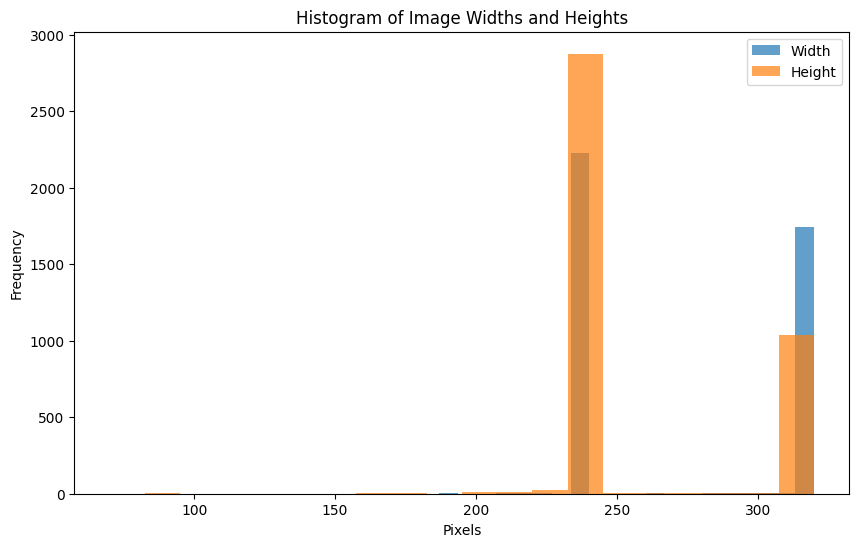

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(image_sizes[:, 0], bins=20, alpha=0.7, label='Width')
plt.hist(image_sizes[:, 1], bins=20, alpha=0.7, label='Height')
plt.title('Histogram of Image Widths and Heights')
plt.xlabel('Pixels')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Part 2: Prepare for Classification**

Since the dataset doesn't have labels, I need to create a classification problem. One way to do this is to assume the images are categorized by their directory names. If that's the case, I can use the folder names as labels. Here’s how:

Extract Labels from Directory Structure 

In [11]:
labels = []
for root, dirs, files in os.walk(dataset_path):
    for dir_name in dirs:
        for file in os.listdir(os.path.join(root, dir_name)):
            if file.endswith(('.png', '.jpg', '.jpeg')):
                labels.append(dir_name)

# Display the first few labels
print(labels[:10])


['Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew', 'Powdery Mildew']


Creating a DataFrame to hold image paths and their corresponding labels:

In [12]:
data = pd.DataFrame({'image_path': image_paths, 'label': labels})
print(data.head())


                                          image_path           label
0  /kaggle/input/mango-leaf-bd-dataset/MangoLeafB...  Powdery Mildew
1  /kaggle/input/mango-leaf-bd-dataset/MangoLeafB...  Powdery Mildew
2  /kaggle/input/mango-leaf-bd-dataset/MangoLeafB...  Powdery Mildew
3  /kaggle/input/mango-leaf-bd-dataset/MangoLeafB...  Powdery Mildew
4  /kaggle/input/mango-leaf-bd-dataset/MangoLeafB...  Powdery Mildew


# **Part 3: Train-Test Split and Image Preprocessing**

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['image_path'], data['label'], test_size=0.2, random_state=42)


In [14]:
def load_and_preprocess_images(image_paths, target_size=(64, 64)):
    images = []
    for img_path in image_paths:
        img = Image.open(img_path).resize(target_size)
        img_array = np.array(img) / 255.0  # Normalize to [0, 1]
        images.append(img_array)
    return np.array(images)

X_train_images = load_and_preprocess_images(X_train)
X_test_images = load_and_preprocess_images(X_test)


LabelEncoder to convert string labels into numerical format:

In [15]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


# **Part 4: Model Training and Evaluation**

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


Train Random Forest Classifier

In [17]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_images.reshape(X_train_images.shape[0], -1), y_train_encoded)

# Predict on test set
rf_predictions = rf_classifier.predict(X_test_images.reshape(X_test_images.shape[0], -1))

# Evaluate Random Forest
print("Random Forest Classifier Performance:")
print(classification_report(y_test_encoded, rf_predictions))
print("Accuracy:", accuracy_score(y_test_encoded, rf_predictions))


Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       112
           1       0.86      0.88      0.87       101
           2       0.97      1.00      0.98        86
           3       0.92      0.94      0.93        93
           4       0.74      0.84      0.79        90
           5       0.92      0.90      0.91        91
           6       0.96      0.82      0.89       123
           7       0.81      0.88      0.84       104

    accuracy                           0.88       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.88      0.88       800

Accuracy: 0.88375


Train Decision Tree Classifier 

In [18]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_images.reshape(X_train_images.shape[0], -1), y_train_encoded)

# Predict on test set
dt_predictions = dt_classifier.predict(X_test_images.reshape(X_test_images.shape[0], -1))

# Evaluate Decision Tree
print("Decision Tree Classifier Performance:")
print(classification_report(y_test_encoded, dt_predictions))
print("Accuracy:", accuracy_score(y_test_encoded, dt_predictions))


Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       0.66      0.66      0.66       112
           1       0.69      0.73      0.71       101
           2       0.86      0.98      0.91        86
           3       0.72      0.76      0.74        93
           4       0.51      0.44      0.48        90
           5       0.67      0.60      0.64        91
           6       0.62      0.51      0.56       123
           7       0.56      0.66      0.61       104

    accuracy                           0.66       800
   macro avg       0.66      0.67      0.66       800
weighted avg       0.66      0.66      0.66       800

Accuracy: 0.6625


# **Summary of EDA**

1. The dataset consists of images of mango leaves organized in a directory structure, where each subfolder represents a different class of leaves.
2. For uniformity, images were resized to 64x64 pixels.
3. Most images were identified as being in RGB format, which is standard for colored images.
4. A histogram was plotted to show the distribution of image widths and heights. This visualization helped identify any outliers or irregularities in image sizes, which could impact the model's performance.
5. The results of the EDA laid the groundwork for the subsequent steps of the project, including splitting the dataset, preprocessing the images, and encoding the labels for the classification task.

# **Comparing the performance of Random Forest and Decision Tree**

1. The Random Forest classifier significantly outperformed the Decision Tree classifier in terms of accuracy (88.38% vs. 66.25%). This indicates that the ensemble method used in Random Forest is more effective for this dataset.
2. Random Forest displayed more consistent precision and recall across different classes, with no class showing a precision or recall below 0.74. In contrast, the Decision Tree struggled with lower performance metrics, particularly for classes 4 and 6, where it achieved precision and recall as low as 0.51 and 0.44, respectively.

# **Conclusion **

The comparison clearly shows that the Random Forest classifier is superior to the Decision Tree classifier for the given dataset. It provides better overall accuracy and more reliable predictions across various classes. The results suggest that for tasks involving this dataset, employing ensemble methods like Random Forest can lead to improved performance in classification tasks.